In [ ]:
# 구글 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기, gameId column 제거
df_all = pd.read_csv('/content/gdrive/My Drive/data/high_diamond_ranked_10min.csv')
df_all = df_all.drop(['gameId'], axis='columns')

df_data = df_all.iloc[:, 1:]
df_label = df_all.iloc[:, 0]

print(df_all.columns)
print(df_data.shape)
print(df_label.shape)

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')
(9879, 38)
(9879,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7903, 38)
(1976, 38)
(7903,)
(1976,)


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_leaf_nodes=15, criterion='gini', n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=15, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
prediction = model.predict(X_test)

acc = 100 * accuracy_score(y_test, prediction)
pre = 100 * precision_score(y_test, prediction)
rec = 100 * recall_score(y_test,prediction)
f1 = 100 * f1_score(y_test,prediction)

print('accuracy : %.2f%%'%(acc))
print('Precision: %.2f%%\nRecall: %.2f%%\nF1-score: %.2f%% '%(pre, rec, f1))

accuracy : 72.62%
Precision: 73.39%
Recall: 70.01%
F1-score: 71.66% 


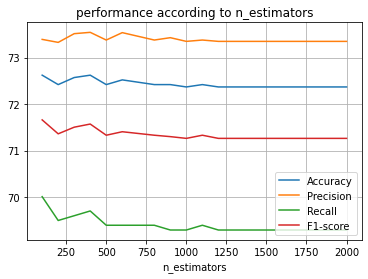

In [13]:
n_est_list, acc_list, pre_list, rec_list, f1_list = [], [], [], [], []
max_index = 0
for i in range(1, 21):
  model = RandomForestClassifier(n_estimators=100*i, max_leaf_nodes=15, criterion='gini', n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  n_est_list.append(100 * i)
  acc_list.append(100 * accuracy_score(y_test, prediction))
  pre_list.append(100 * precision_score(y_test, prediction))
  rec_list.append(100 * recall_score(y_test,prediction))
  f1_list.append(100 * f1_score(y_test,prediction))

  max_index = max(100)

plt.plot(n_est_list, acc_list)
plt.plot(n_est_list, pre_list)
plt.plot(n_est_list, rec_list)
plt.plot(n_est_list, f1_list)

plt.xlabel('n_estimators')
plt.title('performance according to n_estimators')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1-score'], loc = 'lower right', fontsize=10)
plt.grid()
plt.show()

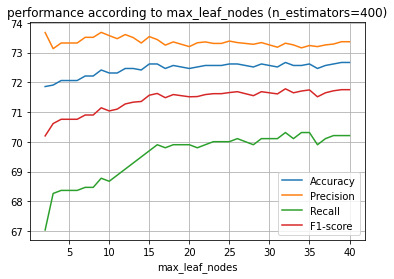

In [19]:
max_leaf_list, acc_list, pre_list, rec_list, f1_list = [], [], [], [], []
for i in range(2, 41):
  model = RandomForestClassifier(n_estimators=400, max_leaf_nodes=i, criterion='gini', n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  max_leaf_list.append(i)
  acc_list.append(100 * accuracy_score(y_test, prediction))
  pre_list.append(100 * precision_score(y_test, prediction))
  rec_list.append(100 * recall_score(y_test,prediction))
  f1_list.append(100 * f1_score(y_test,prediction))

plt.plot(max_leaf_list, acc_list)
plt.plot(max_leaf_list, pre_list)
plt.plot(max_leaf_list, rec_list)
plt.plot(max_leaf_list, f1_list)

plt.xlabel('max_leaf_nodes')
plt.title('performance according to max_leaf_nodes (n_estimators=400)')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1-score'], loc = 'lower right', fontsize=10)
plt.grid()
plt.show()

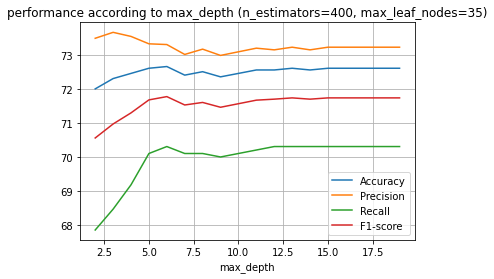

In [26]:
max_depth_list, acc_list, pre_list, rec_list, f1_list = [], [], [], [], []
for i in range(2, 20):
  model = RandomForestClassifier(n_estimators=400, max_leaf_nodes=35, max_depth=i, criterion='gini', n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  max_depth_list.append(i)
  acc_list.append(100 * accuracy_score(y_test, prediction))
  pre_list.append(100 * precision_score(y_test, prediction))
  rec_list.append(100 * recall_score(y_test,prediction))
  f1_list.append(100 * f1_score(y_test,prediction))

plt.plot(max_depth_list, acc_list)
plt.plot(max_depth_list, pre_list)
plt.plot(max_depth_list, rec_list)
plt.plot(max_depth_list, f1_list)

plt.xlabel('max_depth')
plt.title('performance according to max_depth (n_estimators=400, max_leaf_nodes=35)')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1-score'], loc = 'lower right', fontsize=10)
plt.grid()
plt.show()

In [22]:
model = RandomForestClassifier(n_estimators=400, max_leaf_nodes=35, criterion='gini', n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

acc = 100 * accuracy_score(y_test, prediction)
pre = 100 * precision_score(y_test, prediction)
rec = 100 * recall_score(y_test,prediction)
f1 = 100 * f1_score(y_test,prediction)

print('accuracy : %.2f%%'%(acc))
print('Precision: %.2f%%\nRecall: %.2f%%\nF1-score: %.2f%% '%(pre, rec, f1))

accuracy : 72.62%
Precision: 73.24%
Recall: 70.32%
F1-score: 71.75% 


In [23]:
model = RandomForestClassifier(n_estimators=400, max_leaf_nodes=35, criterion='entropy', n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

acc = 100 * accuracy_score(y_test, prediction)
pre = 100 * precision_score(y_test, prediction)
rec = 100 * recall_score(y_test,prediction)
f1 = 100 * f1_score(y_test,prediction)

print('accuracy : %.2f%%'%(acc))
print('Precision: %.2f%%\nRecall: %.2f%%\nF1-score: %.2f%% '%(pre, rec, f1))

accuracy : 72.62%
Precision: 73.44%
Recall: 69.91%
F1-score: 71.63% 
